# COGS 108  
# Exploring Relations Between Crime Index and Unemployment Rate

# Overview

The objective of our project is to detect the relationship between crime index and unemployment rate. After the alayaze of different blocks of San Diego county’s, we hope that we can provide some solutions to handle the unemployment rate and reduce crime index. 

After seeing the different results from previous studies, we want to explore the relationship between the unemployment rate and crime index (based on unique block group code) at San Diego county in our project. Therefore, we suppose that as the increase of crime indices, the unemployment rate at San Diego will also increase. We choose to use three data sets (the unemployment assault, unemployment murder, and  unemployment robbery) from the same website ucsdonline.maps.

First of all, we use the pandas library to read and modify our dataset from the website we mentioned before. Moreover, in order to perform a better analysis, we also use different python libraries, such as numpy, patsy, seaborn, matplotlib and scipy.stats to create images,adjust datas, calculate and so on. First, we want to do some data cleaning to get the clear format of our data. We firstly import data from csv, delete the irrelevant data from the dataframe, and merge the assault and robbery tables together.

Lastly , we will explore our data by seeing how correlated the relationship between the unemployment rate or the crime index is by training a linear regression and taking a look at each pair's Pearson's correlation coefficient. To discuss the positive relationship between the crime index by FIPS block group and its unemployment rate, we also use a multi-linear regression model to check whether there is any confounding variable, and that also affects the unemployment rate here. 

# Names

- Guoyi Li
- Yi Li
- Muchan Li
- Boning Yang
- Zhibo Peng

<a id='research_question'></a>
# Research Question

*Is there a relationship between each block group’s (identified by unique block group code) crime index in San Diego county and corresponding unemployment rate in the year 2020?*

<a id='background'></a>

## Background & Prior Work

Firstly, we would like to define what does “crime index” mean. According to the website “LegalMatch”, the crime index is a list of eight primary crimes from across the country, collected in a report-format, that the government publishes every year (LegalMatch).

Does the unemployment rate to some extent cause crime? Most people would say there is a clear relationship between those two variables; however, in Fredrik Lundqvist’s paper “Unemployment and Crime” in 2018, the research team focuses on the unemployment rate and wants to find the relationship between it and crime in Sweden. They use data from 2007 to 2017 and find there is a weak relationship between those two items (Fredrik Lundqvist,2). Most people would expect to see the positive relationship here, so the first time when we see the result here surprising us a lot, and we begin to think about will the data of San Diego county have the similar pattern as it is in Fredrik Lundqvist’s paper?

In another paper “Identifying the Effect of Unemployment on Crime” by Steven Raphael and Rudolf Winter-Ebmer, their finding is on the opposite side to Fredrik Lundqvist that they find “significant and sizable positive effects of unemployment on the rates of specific violent, as well as property crimes” (Steven Raphael and Rudolf Winter-Ebmer,1).

Those two findings have different points of view towards the relationship between unemployment rate and crime. The difference may be caused by different research areas, which means there may exist regional variables which may potentially affect the relationship. So it will be very interesting if we can explore the data in San Diego by ourselves and to see whether the unemployment rate has a relationship to crime or not. That is the reason why we decide to focus on this question after reading the previous work here.*

References (include links):

1) Steven Raphael, Rudolf Winter-Ebmer, 2020, UCSD Economics Discussion Paper: “Identifying the Effect of Unemployment on Crime” (https://ucsdonline.maps.arcgis.com/)

2) Fredrik Lundqvist, 2018, “Unemployment and Crime” (https://www.diva-portal.org/smash/get/diva2:1252037/FULLTEXT01.pd)

3) Lauren Wallace, 2019, “What is the Crime Index” (https://www.legalmatch.com/law-library/article/what-is-the-crime-index.html)

# Hypothesis


There is a positive correlation between block groups’ crime indices and the unemployment rate in that block group in San Diego county in 2020.

Justification: Learning from common knowledge, everyone need a job to sustain their lives. For those who cannot get a job due to some personal issues, they may consider doing some crimes in order to get the money they need. For example, they may sell drugs or rob others that have money. Also, most people will not have motivations to do crime if they have job to support their families. On the other hand, pressures may push those who do not have job to take risks and do crimes. Based on those perspectives, we make our hypythesis that the area with higher unemployment rate tend to have higher crime indices. (We do not mean that people without a job will definitely do crime; instead, we are just consider for some possibilities).

# Dataset(s)

- Dataset Name: **unemploy_assault.csv**
- Link to the dataset: https://ucsdonline.maps.arcgis.com/home/webmap/viewer.html?webmap=0da45974270b445a8325f61437154dc1
- Number of observations: 627

For this dataset, we select the unemployment rate as the independent variable and the assault index as the dependent variable. The unemployment rate is calculated by dividing the total unemployment population by the total population of the labor force. The assault index is calculated by dividing the total number of assaults by the total population in that area and then multiply the result by 100,000. The raw dataset contains 627 rows and 16 columns (including 2 variables that we select and 14 default variables). 

- Dataset Name: **unemploy_murder.csv**
- Link to the dataset: https://ucsdonline.maps.arcgis.com/home/webmap/viewer.html?webmap=0da45974270b445a8325f61437154dc1
- Number of observations: 627

For this dataset, we select the unemployment rate as the independent variable and the murder index as the dependent variable. The unemployment rate is calculated by dividing the total unemployment population by the total population of the labor force. The murder index is calculated by dividing the total number of murders by the total population in that area and then multiply the result by 100,000.  The raw dataset contains 627 rows and 16 columns (including 2 variables that we select and 14 default variables). 

- Dataset Name: **unemploy_robbery.csv**
- Link to the dataset: https://ucsdonline.maps.arcgis.com/home/webmap/viewer.html?webmap=0da45974270b445a8325f61437154dc1
- Number of observations: 627

For this dataset, we select the unemployment rate as the independent variable and the robbery index as the dependent variable. The unemployment rate is calculated by dividing the total unemployment population by the total population of the labor force. The robbery index is calculated by dividing the total number of robberies by the total population in that area and then multiply the result by 100,000.  The raw dataset contains 627 rows and 16 columns (including 2 variables that we select and 14 default variables).  


We decided on merging all three of our datasets using the unique identifier “FIPS”, which is a numeric serial code used to denote each block group within San Diego county. We believe that its design would serve us greatly as the index of each data table since the code can be assumed to be unique. We would then use the merge() method in pandas to merge the tables together through their unique indices.

# Setup

In [1]:
import pandas as pd
import numpy as np
import patsy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import pearsonr
# We have one more setup that enables 3D formatting, but it
# has to be initiated later down the line in order to keep
# the 2D plots in alignment.

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
assault = pd.read_csv('Data/unemploy_assault.csv')
assault_cleaned = assault.get(['FIPS', 'UNEMPRT_CY', 'CRMCYASST']).set_index('FIPS')
assault_cleaned.columns = ['Unemployment Rate', 'Assault Crime Index']
assault_cleaned.head()

,Unemployment Rate,Assault Crime Index
FIPS,,
6073002302,22.0,216.0
6073020109,14.6,69.0
6073009107,15.5,46.0
6073007702,14.6,14.0
6073017010,15.3,20.0


In [3]:
robbery = pd.read_csv('Data/unemploy_robbery.csv')
robbery_cleaned = robbery.get(['FIPS', 'UNEMPRT_CY', 'CRMCYROBB']).set_index('FIPS')
robbery_cleaned.columns = ['Unemployment Rate', 'Robbery Crime Index']
robbery_cleaned.head()

,Unemployment Rate,Robbery Crime Index
FIPS,,
6073002302,22.0,120.0
6073020109,14.6,23.0
6073009107,15.5,46.0
6073007702,14.6,50.0
6073017010,15.3,12.0


In [4]:
murder = pd.read_csv('Data/unemploy_murder.csv')
murder_cleaned = murder.get(['FIPS', 'UNEMPRT_CY', 'CRMCYMURD']).set_index('FIPS')
murder_cleaned.columns = ['Unemployment Rate', 'Murder Crime Index']
murder_cleaned.head()

,Unemployment Rate,Murder Crime Index
FIPS,,
6073002302,22.0,92.0
6073020109,14.6,43.0
6073009107,15.5,10.0
6073007702,14.6,19.0
6073017010,15.3,13.0


In [5]:
final_data_1 = assault_cleaned.merge(robbery_cleaned, left_index = True, right_index = True)
final_data = final_data_1.merge(murder_cleaned, left_index = True, right_index = True)
final_data.drop(columns = ['Unemployment Rate_x', 'Unemployment Rate_y'], inplace = True)
final_data

,Assault Crime Index,Robbery Crime Index,Unemployment Rate,Murder Crime Index
FIPS,,,,
6073002302,216.0,120.0,22.0,92.0
6073020109,69.0,23.0,14.6,43.0
6073009107,46.0,46.0,15.5,10.0
6073007702,14.0,50.0,14.6,19.0
6073017010,20.0,12.0,15.3,13.0
...,...,...,...,...
6073013601,48.0,21.0,15.9,41.0
6073020107,11.0,8.0,14.1,19.0
6073021500,7.0,26.0,11.3,4.0


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

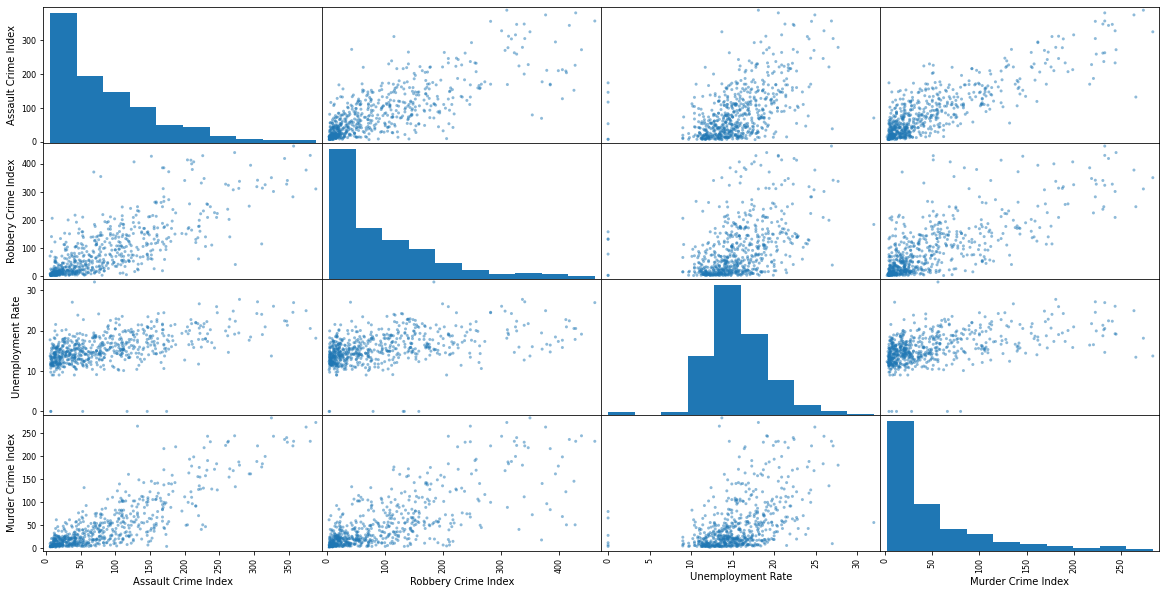

In [6]:
# We want to first get an overview of the relationships between 
# any two of our variables as well as the distribution of each variable.
overview = pd.plotting.scatter_matrix(final_data, figsize = (20, 10))

In [7]:
# We first take a look at how many unique assault crime indices there are.
# The length of the output array factor into our decision on how many bins 
# our histogram should take.
final_data['Assault Crime Index'].unique()

array([216.,  69.,  46.,  14.,  20.,  41., 153.,  28.,  65., 133.,  24.,
       226.,   9., 114.,  98.,  73.,  52., 126., 101.,  79.,  12.,  32.,
       117., 112.,  15., 111.,  35.,  43., 100.,  57.,  84.,  44.,  42.,
       230., 106., 147., 102., 115.,  25., 173.,  49.,  10.,  18.,  89.,
       132., 357.,  81.,  48.,  78.,  13., 123.,  16.,  34.,   7., 171.,
       120.,  37., 272.,  38.,  17.,  74.,  55.,  39., 109., 168.,  19.,
       146., 202.,  53.,  21.,   8.,  26., 186., 134.,  29.,  50., 156.,
        54., 221.,  31., 158., 159.,  77.,  95., 152., 206.,  27., 122.,
       312., 142., 209., 110., 150.,  96.,  62., 170.,  99., 293.,  56.,
        90., 181., 119., 105.,  22., 375., 128.,  33.,  72., 223.,  70.,
        85.,  94., 200.,  11., 177., 328., 157.,  76.,  75., 259., 316.,
        82.,  47., 270., 243., 154., 131.,  67., 103.,  66., 165., 279.,
       148., 104.,  45., 219., 344.,  68., 116., 160.,  83., 108.,  51.,
        64., 204., 247.,  36., 161., 222., 136., 21

In [8]:
len(final_data['Assault Crime Index'].unique())

218

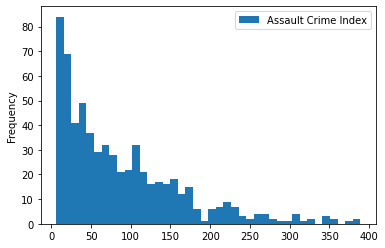

In [9]:
# We want to visualize the histogram of all the assault 
# indices on its own to get a better view.
assault_histogram = final_data.plot(kind = 'hist', y = 'Assault Crime Index', bins = 40)

In [10]:
# Similarly, we inspect the unique values in 'Robbery Crime Index'.
final_data['Robbery Crime Index'].unique()

array([120.,  23.,  46.,  50.,  12.,  61.,   4.,  55.,   9.,   7., 428.,
        13.,  35.,  49.,  30.,  84., 117.,  54., 143., 145., 200., 144.,
        58., 148.,  98.,  26., 105.,  94.,  42.,  29.,  10., 106., 179.,
       108.,  15.,  52.,  76.,  24.,  34.,   6.,  19., 247., 159., 462.,
        81., 146.,  21.,  89.,   8., 185., 151.,  67., 176.,  53., 233.,
       439.,  16., 192.,  99.,  36.,  57.,  17.,  20., 134.,  77., 150.,
       210., 109.,  18., 158., 354.,  95., 191.,  47.,  56., 231.,  40.,
        82.,  33.,   5., 152.,  27.,  22.,  60., 217., 199., 264.,  78.,
        93., 426., 173.,  70., 153., 241., 313., 116., 170., 412., 103.,
       385., 212.,  73., 138.,  43.,  11., 266., 204.,  25., 249.,  28.,
        38., 125.,  96.,  88.,  71., 377., 188.,  75., 201.,  32.,  66.,
       222., 126., 194., 110., 340., 209., 272., 301., 263., 130., 113.,
       104., 327., 325., 107., 219., 135., 307., 226., 172.,  31., 139.,
       337., 211.,  59., 140.,   3.,  39., 168., 13

In [11]:
len(final_data['Robbery Crime Index'].unique())

240

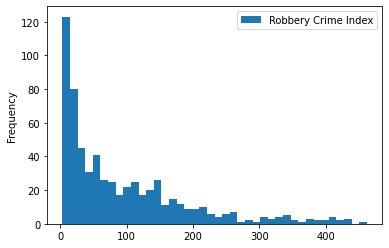

In [12]:
robbery_histogram = final_data.plot(kind = 'hist', y = 'Robbery Crime Index', bins = 40)

In [13]:
# Inspection for 'Murder Crime Index'.
final_data['Murder Crime Index'].unique()

array([ 92.,  43.,  10.,  19.,  13.,  23.,  22.,   5.,   6.,  68.,  14.,
        51.,  34.,  44.,   7.,  30., 103.,  67.,  21.,   8.,  57.,  16.,
        58.,  56.,  36.,  47., 140., 106.,  77.,  20., 101.,   9., 107.,
       266.,  76., 233.,  24.,  62.,  38.,  17.,  50.,   3.,  18.,  96.,
        27.,  12., 245.,  25.,  11.,  70.,  28.,  85., 123.,  94.,  40.,
        80.,  73.,   4., 143.,  46.,  15., 136., 146., 164.,  75., 184.,
        64.,  89.,  71.,  84.,  49.,  41.,  45., 162., 161.,  55., 264.,
        59., 102., 129., 112., 117., 244., 141., 224., 200.,  48.,  83.,
       169., 172.,  90.,  66.,  33., 125.,  39., 109.,  63.,  35., 181.,
        54., 156., 237.,  31.,  29., 127., 155.,  52.,  42., 199., 142.,
       111., 177., 149., 170., 241.,  60.,  26., 113., 158., 100.,  95.,
        65.,  32., 274.,  37.,  69., 105., 284., 231., 131.,  81.,  53.,
       217., 159., 219., 189.,  72., 232.,  99., 188., 221., 120.,   2.,
        93., 124., 138., 194., 134., 179.,  87., 19

In [14]:
len(final_data['Murder Crime Index'].unique())

160

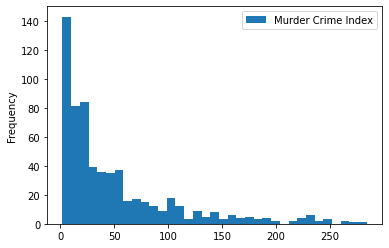

In [15]:
murder_histogram = final_data.plot(kind = 'hist', y = 'Murder Crime Index', bins = 35)

In [16]:
# Most importantly, we need to inspect the distribution of unemployment rate by FIPS.
final_data['Unemployment Rate'].unique()

array([22. , 14.6, 15.5, 15.3, 15.6, 17.2, 13.9, 14. , 12.3, 21.4, 12.9,
       17.8, 13.3, 20. , 10.9, 12.1, 23.8, 16.2, 22.9, 16.7, 18. , 16.9,
       15.4, 12.4, 18.1, 14.1, 10.5, 20.4, 14.2, 10.4, 17.5, 16.5, 17.9,
       14.9, 23.4, 19.7, 15. , 13. , 13.2, 16.6, 17. , 13.4, 26.9, 12.7,
       15.2, 14.8, 20.3, 19. , 12.2,  0. , 17.1, 19.1, 16.8, 10.8, 11.5,
       11.8, 11.4, 20.2, 19.8,  9. , 16.3, 14.4, 16. , 11.6, 11. , 21.5,
       18.5, 27. , 16.1, 20.7, 12.8, 14.3, 13.7, 26.6, 20.5, 13.5, 19.6,
       22.2, 22.7, 23.5, 14.7, 18.6, 11.2, 12.6, 10.6, 14.5, 17.6, 19.3,
       17.4, 10.2, 15.9, 11.7, 13.6, 24.9, 15.1, 11.9, 15.8, 21.2, 18.7,
       18.9, 17.3, 26. , 24.1, 19.9, 20.9, 24.8, 15.7, 22.8, 27.7,  9.8,
       12. , 11.3,  9.7, 16.4, 21.7, 22.4, 10.3, 18.8, 24.4, 21.6,  9.1,
       24. , 10.7, 18.4, 22.3, 25.9, 22.5, 19.2, 13.8, 32. , 21.9, 13.1,
       21. , 12.5, 21.3, 17.7, 11.1, 24.2, 18.2, 19.4, 20.8, 24.5, 10.1,
       19.5, 20.6, 27.1])

In [17]:
len(final_data['Unemployment Rate'].unique())

146

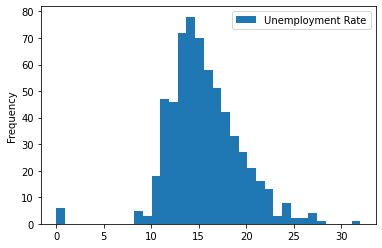

In [18]:
unemploy_histogram = final_data.plot(kind = 'hist', y = 'Unemployment Rate', bins = 35)

Seems rather interesting that a few block groups have unemployment rate around 1%. In addition, the counts at 1% and at 30% or so seems disconnected from the general body of distribution. We'll revisit this and see if there's any particular reason that these data points are seemingly outlying.

In addition, we would also like to explore the extremeness of values within unemployment rate and the three crime indices, which may very well be outliers.

In [19]:
# We first determine the cutoff of extreme observations by the conventional 
# least and most extreme 2.5 percentile approach.
lower_5_assault = np.percentile(final_data['Assault Crime Index'], 2.5)
upper_5_assault = np.percentile(final_data['Assault Crime Index'], 97.5)

lower_5_robbery = np.percentile(final_data['Robbery Crime Index'], 2.5)
upper_5_robbery = np.percentile(final_data['Robbery Crime Index'], 97.5)

lower_5_murder = np.percentile(final_data['Murder Crime Index'], 2.5)
upper_5_murder = np.percentile(final_data['Murder Crime Index'], 97.5)

lower_5_unemploy = np.percentile(final_data['Unemployment Rate'], 2.5)
upper_5_unemploy = np.percentile(final_data['Unemployment Rate'], 97.5)

In [20]:
# We create four new dataframes, each with respect to the extreme observations 
# in assault index, robbery index, murder index, and unemployment rate, while leaving 
# other data entries the same.
extreme_assault_indices = final_data[(final_data['Assault Crime Index'] <= lower_5_assault) 
                                     | 
                                     (final_data['Assault Crime Index'] >= upper_5_assault)]
extreme_robbery_indices = final_data[(final_data['Robbery Crime Index'] <= lower_5_robbery)
                                     |
                                     (final_data['Robbery Crime Index'] >= upper_5_robbery)]
extreme_murder_indices = final_data[(final_data['Murder Crime Index'] <= lower_5_murder)
                                    |
                                    (final_data['Murder Crime Index'] >= upper_5_murder)]
extreme_unemploy_indices = final_data[(final_data['Unemployment Rate'] <= lower_5_unemploy)
                                      |
                                      (final_data['Unemployment Rate'] >= upper_5_unemploy)]

<AxesSubplot:xlabel='FIPS'>

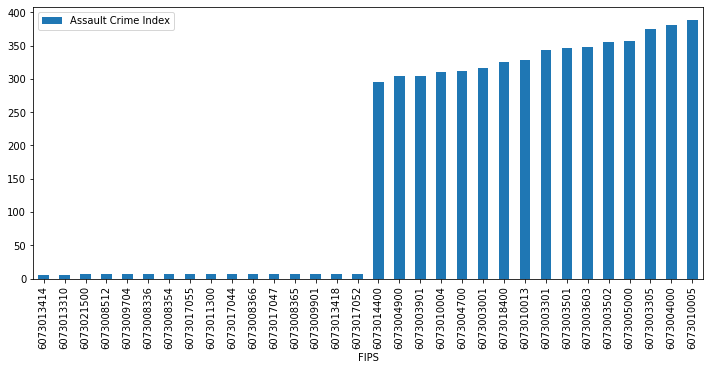

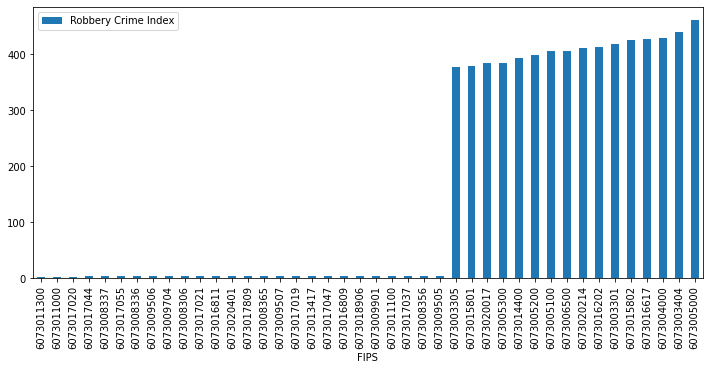

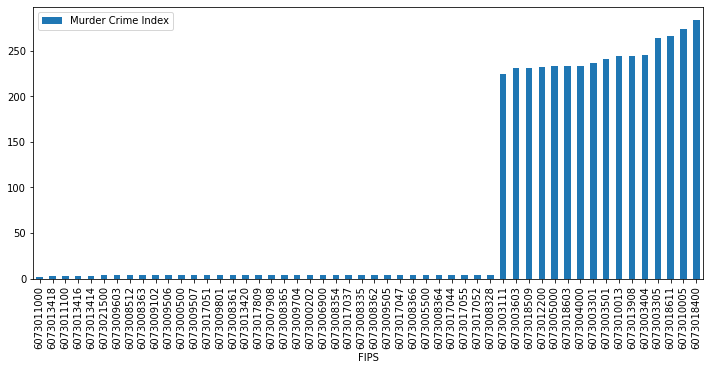

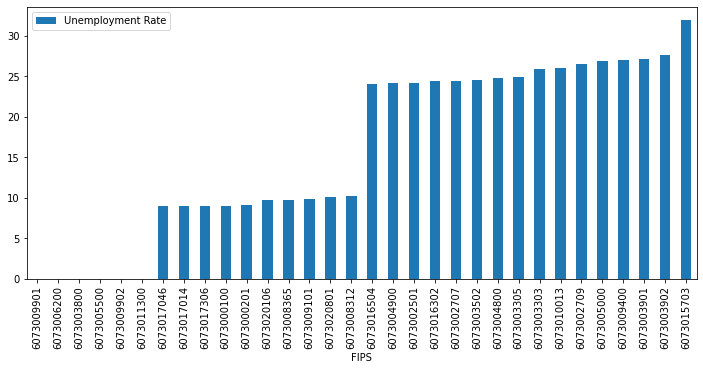

In [21]:
# Now, we visualize each category of these extreme observations by bar charts.
extreme_assault_indices.sort_values(by = 'Assault Crime Index', inplace = True)
extreme_assault_indices.plot(kind = 'bar', 
                             y = 'Assault Crime Index',
                             figsize = (12, 5)
                            )
extreme_robbery_indices.sort_values(by = 'Robbery Crime Index', inplace = True)
extreme_robbery_indices.plot(kind = 'bar', 
                             y = 'Robbery Crime Index', 
                             figsize = (12, 5)
                            )
extreme_murder_indices.sort_values(by = 'Murder Crime Index', inplace = True)
extreme_murder_indices.plot(kind = 'bar', 
                            y = 'Murder Crime Index', 
                            figsize = (12, 5)
                           )
extreme_unemploy_indices.sort_values(by = 'Unemployment Rate', inplace = True)
extreme_unemploy_indices.plot(kind = 'bar',
                              y = 'Unemployment Rate',
                              figsize = (12, 5)
                             )

Lastly, we would like the explore the overall extremeness in all three crime indices combined.

In [22]:
# We assign a new column to our "final_data" dataframe, which will contain
# the sum of all three crime indices.
final_data = final_data.assign(Total_Crime_Index 
                               = 
                               final_data['Assault Crime Index'] + final_data['Robbery Crime Index'] + final_data['Murder Crime Index']
                              )
# We find the cutoff to the most extreme observations still by the 
# statistical convention of p = 5%.
lowest = np.percentile(final_data['Total_Crime_Index'], 2.5)
highest = np.percentile(final_data['Total_Crime_Index'], 97.5)
extreme_crime_indices = final_data[(final_data['Total_Crime_Index'] <= lowest)
                                   |
                                   (final_data['Total_Crime_Index'] >= highest)]

extreme_crime_indices.sort_values(by = 'Total_Crime_Index', inplace = True)
extreme_crime_indices.head()

,Assault Crime Index,Robbery Crime Index,Unemployment Rate,Murder Crime Index,Total_Crime_Index
FIPS,,,,,
6073008365,7.0,4.0,9.7,4.0,15.0
6073009704,7.0,4.0,13.0,4.0,15.0
6073017047,7.0,4.0,13.4,4.0,15.0
6073017055,7.0,4.0,10.7,4.0,15.0
6073017044,7.0,4.0,11.8,4.0,15.0


From the view above, we notice that even though the total crime index may be the same across different FIPS regions, the unemployment rate varies. This is an important fact to note since it reveals that our variables are not co-linear, hence we are not violating some of the ground assumptions of carrying out linear and multi-linear regression analyses, which would be displayed in the following. This observation also seems to indicate that there is no clear relationship between unemployment rate and crime indices, which confirms the claim of one of our background-researching papers. However, is this really the case? We'll find out later in our analyses.

# Exploring relationships between unemployment rate and any of the three other variables

From the views of our scatter matrix, it seems that there's an positive relationship between unemployment rate and assault crime index, unemployment rate and robbery crime index, and unemployment rate and murder crime index. Now, we want to first quantify this relationship through linear regression. We would then also want to take a look at each pair's Pearson's correlation coefficient to give us an idea of standardized correlation strength, in order for us to potentially draw any comparison.

In [23]:
# We rename the columns for convenience of formula wiriting in 'patsy'.
final_data.columns = ['Assault_Index', 'Robbery_Index', 'Unemployment', 'Murder_Index', 'Total']
final_data.head()

,Assault_Index,Robbery_Index,Unemployment,Murder_Index,Total
FIPS,,,,,
6073002302,216.0,120.0,22.0,92.0,428.0
6073020109,69.0,23.0,14.6,43.0,135.0
6073009107,46.0,46.0,15.5,10.0,102.0
6073007702,14.0,50.0,14.6,19.0,83.0
6073017010,20.0,12.0,15.3,13.0,45.0


## First, we look at the linear regression model between assault crime index and unemployment rate.

In [24]:
outcome_1, predictor_1 = patsy.dmatrices('Unemployment ~ Assault_Index', final_data
                                         ) # Assault crime index is our predictor 
mod_1 = sm.OLS(outcome_1, predictor_1)
res_1 = mod_1.fit()

In [25]:
# Let's take a look at our regression result.
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     251.7
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           6.94e-48
Time:                        13:53:46   Log-Likelihood:                -1617.6
No. Observations:                 627   AIC:                             3239.
Df Residuals:                     625   BIC:                             3248.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.2768      0.194     68.440      0.000      12.896      13.658
Assault_Index     0.0267      0.002     15.866      0.000       0.023       0.030
==============================================================================
Omnibus:                      118.441   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              992.229
Skew:                          -0.567   Prob(JB):                    3.47e-216
Kurtosis:                       9.057   Cond. No.                         175.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the summary, we can see that the p-value is smaller than 0.001, representing that the positive correlation between two varibles is not likely due to random chance.

From the summary, we find out that Beta 1 is 0.0267, which means the the unemployment rate will be increase by 0.0267 as assault index increases by one. Unemployment rate will be 13.2768 when assualt index equal to zero.

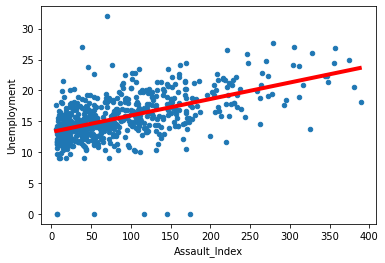

In [26]:
# Plot the regression model on top of the scatter plot of assault crime index and unemployment rate.
final_data.plot(kind = 'scatter', x = 'Assault_Index', y = 'Unemployment');

# Generate and plot the model fit line
xs = np.arange(final_data['Assault_Index'].min(), final_data['Assault_Index'].max())
ys = res_1.params[1] * xs + res_1.params[0]
plt.plot(xs, ys, '-r', linewidth=4);
plt.show()

From the graph, we can see that there are positive correlation between assault index and unemployment rate. Most unemployment rate is between 10 and 20, roughly centering at 15. Most assault indices are below 200, but we might have few outliers above 350.

## We then construct a linear regression model for robbery crime index and unemployment rate.

In [27]:
outcome_2, predictor_2 = patsy.dmatrices('Unemployment ~ Robbery_Index', final_data
                                         ) # Robbery crime index is our predictor 
mod_2 = sm.OLS(outcome_2, predictor_2)
res_2 = mod_2.fit()
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     162.4
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           3.13e-33
Time:                        13:53:47   Log-Likelihood:                -1651.2
No. Observations:                 627   AIC:                             3306.
Df Residuals:                     625   BIC:                             3315.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.9325      0.187     74.312      0.000      13.564      14.301
Robbery_Index     0.0178      0.001     12.744      0.000       0.015       0.021
==============================================================================
Omnibus:                       81.354   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              446.784
Skew:                          -0.410   Prob(JB):                     9.60e-98
Kurtosis:                       7.053   Cond. No.                         186.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the summary, we can see that the p-value is smaller than 0.001, representing that the positive correlation between two varibles is not likely due to random chance.

From the summary, we find out that Beta 1 is 0.0178, which means the the unemployment rate will be increase by 0.0178 as robbery index increases by one. Unemployment rate will be 13.9325 when robbery index equal to zero.


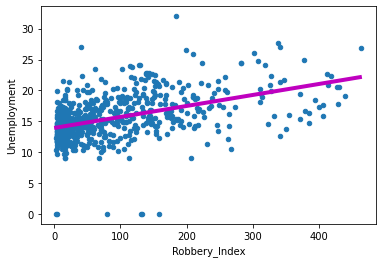

In [28]:
# Plot the regression model on top of the scatter plot of robbery crime index and unemployment rate.
final_data.plot(kind = 'scatter', x = 'Robbery_Index', y = 'Unemployment');

xs = np.arange(final_data['Robbery_Index'].min(), final_data['Robbery_Index'].max())
ys = res_2.params[1] * xs + res_2.params[0]
plt.plot(xs, ys, '-m', linewidth=4);
plt.show()

From the graph, we can see that there are positive correlation between robbery index and unemployment rate, but the slope is slightly smaller than the correlation between assault index and unemployment rate. Most unemployment rate is between 10 and 20, roughly centering at 15. Most robbery indices are below 200, but we might have few outliers above 400.

## Lastly, we construct the regression model for murder index and unemployment rate

In [29]:
outcome_3, predictor_3 = patsy.dmatrices('Unemployment ~ Murder_Index', final_data
                                         ) # Murder crime index is our predictor 
mod_3 = sm.OLS(outcome_3, predictor_3)
res_3 = mod_3.fit()
res_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     194.5
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           1.09e-38
Time:                        13:53:47   Log-Likelihood:                -1638.7
No. Observations:                 627   AIC:                             3281.
Df Residuals:                     625   BIC:                             3290.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.9381      0.178     78.484      0.000      13.589      14.287
Murder_Index     0.0330      0.002     13.947      0.000       0.028       0.038
==============================================================================
Omnibus:                       82.320   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              486.351
Skew:                          -0.389   Prob(JB):                    2.46e-106
Kurtosis:                       7.244   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the summary, we can see that the p-value is smaller than 0.001, representing that the positive correlation between two varibles is not likely due to random chance.

From the summary, we find out that Beta 1 is 0.0330, which means the the unemployment rate will be increase by 0.0330 as murder index increases by one. Unemployment rate will be 13.9381 when murder index equal to zero.


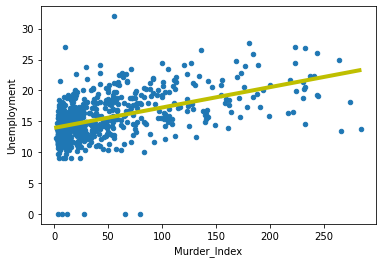

In [30]:
# Plot the regression model on top of the scatter plot of murder crime index and unemployment rate.
final_data.plot(kind = 'scatter', x = 'Murder_Index', y = 'Unemployment');

xs = np.arange(final_data['Murder_Index'].min(), final_data['Murder_Index'].max())
ys = res_3.params[1] * xs + res_3.params[0]
plt.plot(xs, ys, '-y', linewidth=4);
plt.show()

From the graph, we can see that there are positive correlation between murder index and unemployment rate. Most unemployment rate is between 10 and 20, roughly centering at 15. Most murder indices are below 100, but we might have few outliers above 250.

## Now, we want to calculate the Pearson's r for all three pairs of data to see which pair of correlation seems the strongest.

In [31]:
# For assault crime index and unemployment rate.
print('model_1 beta: ' , res_1.params[1])
print('corr: ', pearsonr(final_data['Assault_Index'],final_data['Unemployment'])[0])

model_1 beta:  0.02669001474653202
corr:  0.5358338903003557


In [32]:
# For robbery crime index and unemployment rate.
print('model_2 beta: ' , res_2.params[1])
print('corr: ', pearsonr(final_data['Robbery_Index'],final_data['Unemployment'])[0])

model_2 beta:  0.017828244866400982
corr:  0.45414919004805254


In [33]:
# For murder crime index and unemployment rate.
print('model_3 beta: ' , res_3.params[1])
print('corr: ', pearsonr(final_data['Murder_Index'],final_data['Unemployment'])[0])

model_3 beta:  0.03298045786527979
corr:  0.48719319191401067


Through our preliminary view on the Pearson's r's, `0.536 > 0.454` and `0.536 > 0.487`, it seems that the assault crime index and the unemployment rate has the strongest positive correlation.

# Discussion of Possible Outliers

Our Pearson's r examinations are preliminary because just like we've mentioned by the end of our last histogram visualizing the distribution of unemployment rates, there seem to be outliers. A few FIPS regions seem to have underwhelmingly low unemployment rates (which are good, just too far from the general cluster) and a few have overwhelmingly high percentages, as we can see in the boxplot below. We hence suspect that these data points are outliers that lie far beyond our inter-quartile range and we decide to have them temporarily removed so that we can see whether they have drastic effects on the strength of our correlation.

<AxesSubplot:xlabel='Unemployment'>

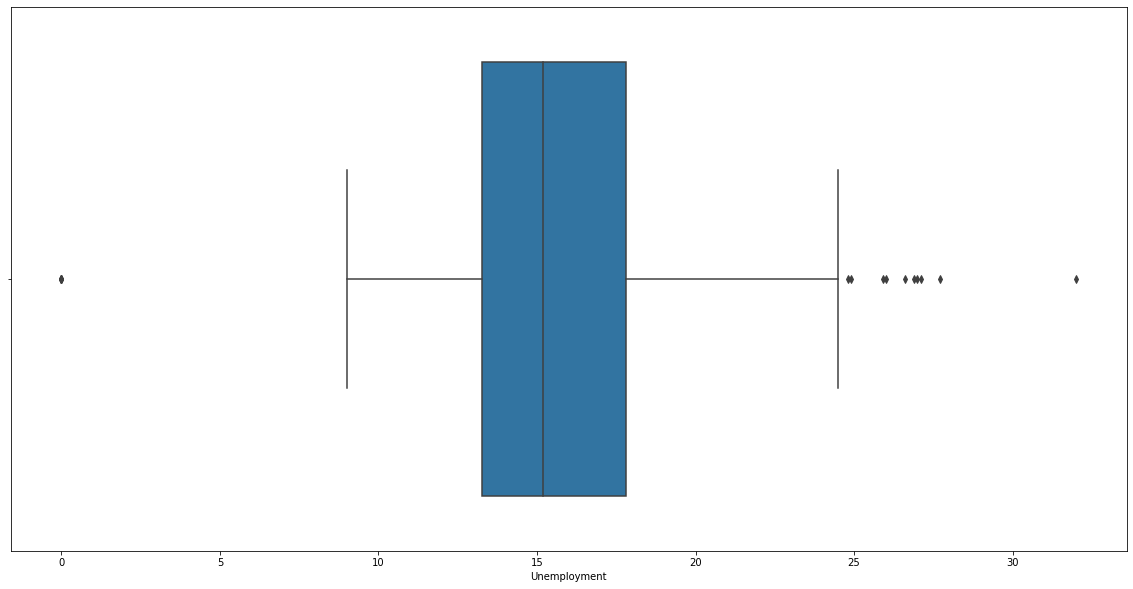

In [34]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = 'Unemployment', data = final_data)

In [35]:
# We need to determine the 25th and 75th percentile cutoff of the unemployment rates.
lower, upper = np.percentile(final_data['Unemployment'], [25, 75])
lower, upper

(13.25, 17.8)

In [36]:
# Calculating IQR and the lower bound and upper bound for values to be deemed outliers.
IQR = upper - lower
lower_bound = lower - 1.5 * IQR
upper_bound = upper + 1.5 * IQR
lower_bound, upper_bound

(6.424999999999999, 24.625)

In [37]:
# Temporarily remove all rows that contain an unemployment 
# rate out of the range bounded by the lower and upper bound.
outlier_free_data = final_data[
    (final_data.get('Unemployment') >= lower_bound) 
    & 
    (final_data.get('Unemployment') <= upper_bound)]
outlier_free_data

,Assault_Index,Robbery_Index,Unemployment,Murder_Index,Total
FIPS,,,,,
6073002302,216.0,120.0,22.0,92.0,428.0
6073020109,69.0,23.0,14.6,43.0,135.0
6073009107,46.0,46.0,15.5,10.0,102.0
6073007702,14.0,50.0,14.6,19.0,83.0
6073017010,20.0,12.0,15.3,13.0,45.0
...,...,...,...,...,...
6073013601,48.0,21.0,15.9,41.0,110.0
6073020107,11.0,8.0,14.1,19.0,38.0
6073021500,7.0,26.0,11.3,4.0,37.0


Since we are just doing preliminary exploration on outliers, we will refer to the new Pearson's r to see if having the outliers removed produces any effect on the strength of the correlations.

In [38]:
# Comparing the original Pearson'r between assault index and unemployment rate and the updated one.
print('Original r: ', pearsonr(final_data['Assault_Index'], final_data['Unemployment'])[0])
print('Updated r: ', pearsonr(outlier_free_data['Assault_Index'], outlier_free_data['Unemployment'])[0])

Original r:  0.5358338903003557
Updated r:  0.5612841283698332


In [39]:
# Comparing the original Pearson'r between robbery index and unemployment rate and the updated one.
print('Original r: ', pearsonr(final_data['Robbery_Index'], final_data['Unemployment'])[0])
print('Updated r: ', pearsonr(outlier_free_data['Robbery_Index'], outlier_free_data['Unemployment'])[0])

Original r:  0.45414919004805254
Updated r:  0.4563102613032818


In [40]:
# Comparing the original Pearson'r between murder index and unemployment rate and the updated one.
print('Original r: ', pearsonr(final_data['Murder_Index'], final_data['Unemployment'])[0])
print('Updated r: ', pearsonr(outlier_free_data['Murder_Index'], outlier_free_data['Unemployment'])[0])

Original r:  0.48719319191401067
Updated r:  0.48289182865554053


Seems like having outliers removed produce different effects on the strengths of our r's. The r for assault index and unemployment and robbery index and unemployment increased, whereas it decreased for murder index and unemployment rate. 

# Multi-linear regression

We are now moving one step closer to answering our hypothesis regarding whether there is a positive relationship between the crime index by FIPS block group and its unemployment rate. Since the crime index is essentially the summation of the three individual indices, we need to examine how any pair, and ultimately all three indices as a whole, influence our unemployment rate in order that we can ensure a valid finding that would be in the same domain as our hypothesis. Moreover, a multi-linear regression model can also shed insights on whether there exists any confounding variable, depending on our new coefficient of determination, that also affects the unemployment rate. We will carry on the multi-linear analysis using the dataset `outlier_free_data` in consistency with our discussion above regarding outliers in our dependent variable, unemployment rate.

In [41]:
# This setup has to be implemented here so that the format of all
# the 2D plots won't be disrupted.
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [42]:
# We store all four series of data entries explicitly as arrays here
# for convenience of meshing and griding them into 3D matrices.
assault = np.asarray(outlier_free_data['Assault_Index'])
robbery = np.asarray(outlier_free_data['Robbery_Index'])
murder = np.asarray(outlier_free_data['Murder_Index'])
unemploy = np.asarray(outlier_free_data['Unemployment'])

In [43]:
# We fit a multi-linear model using assault and robbery index are our predictors.
outcome_4, predictor_4 = patsy.dmatrices('Unemployment ~ Assault_Index + Robbery_Index', 
                                         outlier_free_data
                                         )  
mod_4 = sm.OLS(outcome_4, predictor_4)
res_4 = mod_4.fit()
res_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     141.5
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           3.44e-51
Time:                        13:53:47   Log-Likelihood:                -1457.8
No. Observations:                 611   AIC:                             2922.
Df Residuals:                     608   BIC:                             2935.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.4623      0.164     81.987      0.000      13.140      13.785
Assault_Index     0.0221      0.002      9.875      0.000       0.018       0.026
Robbery_Index     0.0027      0.002      1.528      0.127      -0.001       0.006
==============================================================================
Omnibus:                        9.944   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.004
Skew:                           0.285   Prob(JB):                      0.00672
Kurtosis:                       3.259   Cond. No.                         255.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>


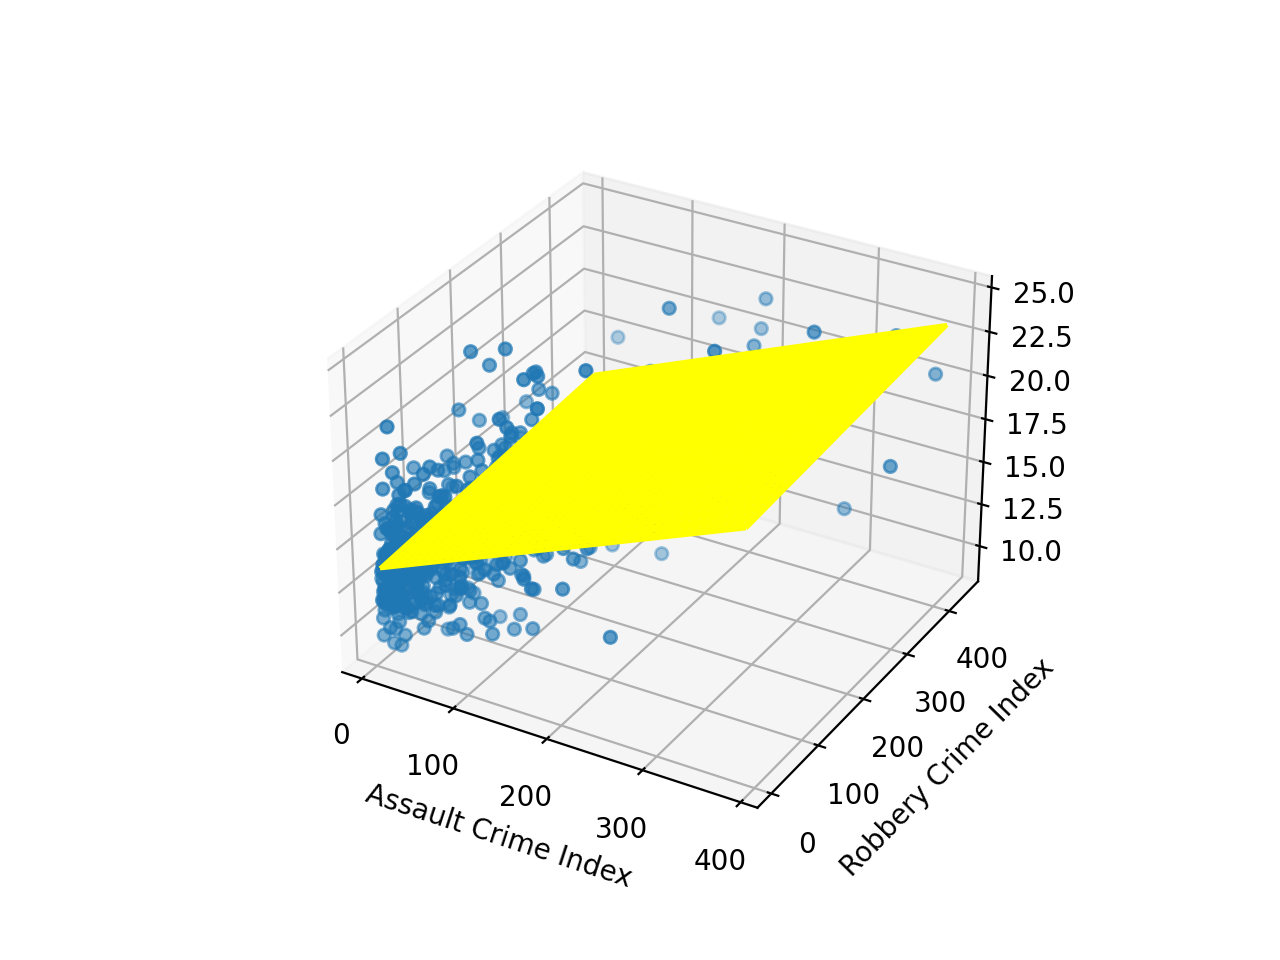

In [44]:
# We create a 3D scatter plot with "assault", "robbery", and "unemploy".
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(assault,
           robbery, 
           unemploy
          )
plt.xlabel('Assault Crime Index')
plt.ylabel('Robbery Crime Index')

# Meshing and griding the assault and robbery data into 3D forms.
XX, YY = np.mgrid[min(assault):max(assault):3, min(robbery):max(robbery):3]

# Putting together the regression equation using the parameters we 
# just derived from our model above and the mesh-grided predictor data.
Z = res_4.params[0] + res_4.params[1] * XX + res_4.params[2] * YY
ax.plot_wireframe(XX, YY, Z, color = 'yellow')

In [45]:
# Assault and murder index are our predictors for this model.
outcome_5, predictor_5 = patsy.dmatrices('Unemployment ~ Assault_Index + Murder_Index', 
                                         outlier_free_data
                                         ) 
mod_5 = sm.OLS(outcome_5, predictor_5)
res_5 = mod_5.fit()
res_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     140.3
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           7.97e-51
Time:                        13:53:47   Log-Likelihood:                -1458.6
No. Observations:                 611   AIC:                             2923.
Df Residuals:                     608   BIC:                             2936.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.4948      0.164     82.185      0.000      13.172      13.817
Assault_Index     0.0229      0.003      8.567      0.000       0.018       0.028
Murder_Index      0.0029      0.004      0.806      0.421      -0.004       0.010
==============================================================================
Omnibus:                       11.205   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.371
Skew:                           0.304   Prob(JB):                      0.00339
Kurtosis:                       3.277   Cond. No.                         200.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>


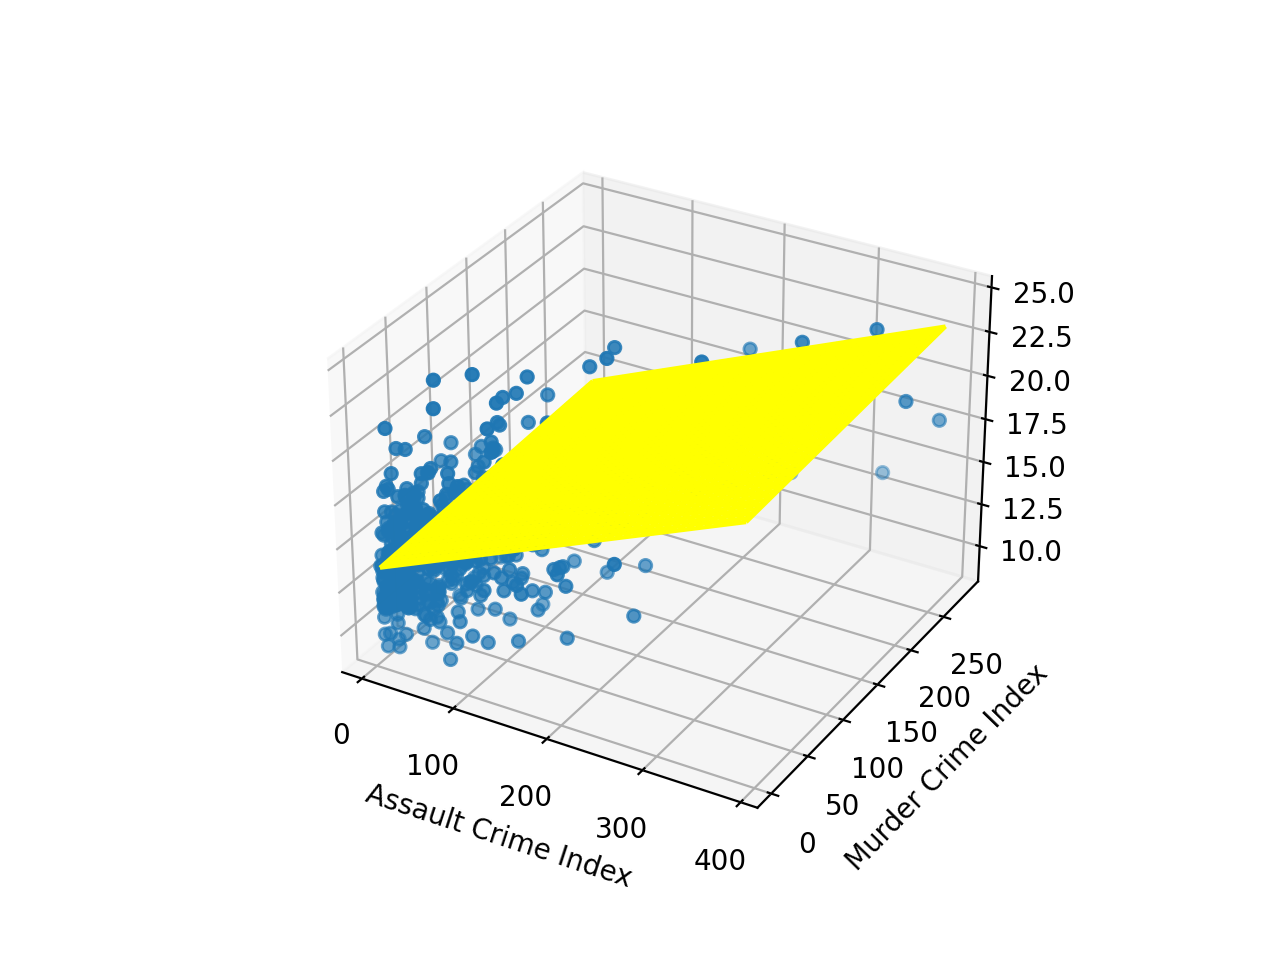

In [46]:
# We followed the same procedure as we did with model 4 to create 
# another 3D visualization of our linearly-fitted plane.
fig_1 = plt.figure()
ax_1 = fig_1.add_subplot(111, projection = '3d')
ax_1.scatter(assault,
           murder, 
           unemploy
          )
plt.xlabel('Assault Crime Index')
plt.ylabel('Murder Crime Index')

XX_1, YY_1 = np.mgrid[min(assault):max(assault):3, min(murder):max(murder):3]
Z_1 = res_5.params[0] + res_5.params[1] * XX_1 + res_5.params[2] * YY_1
ax_1.plot_wireframe(XX_1, YY_1, Z_1, color = 'yellow')

In [47]:
# Murder and robbery index are our predictors 
outcome_6, predictor_6 = patsy.dmatrices('Unemployment ~ Murder_Index + Robbery_Index', 
                                         outlier_free_data
                                         ) 
mod_6 = sm.OLS(outcome_6, predictor_6)
res_6 = mod_6.fit()
res_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     105.8
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           3.60e-40
Time:                        13:53:47   Log-Likelihood:                -1483.3
No. Observations:                 611   AIC:                             2973.
Df Residuals:                     608   BIC:                             2986.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.9389      0.158     88.005      0.000      13.628      14.250
Murder_Index      0.0191      0.003      6.405      0.000       0.013       0.025
Robbery_Index     0.0077      0.002      4.534      0.000       0.004       0.011
==============================================================================
Omnibus:                        9.127   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.182
Skew:                           0.299   Prob(JB):                       0.0101
Kurtosis:                       3.058   Cond. No.                         206.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>


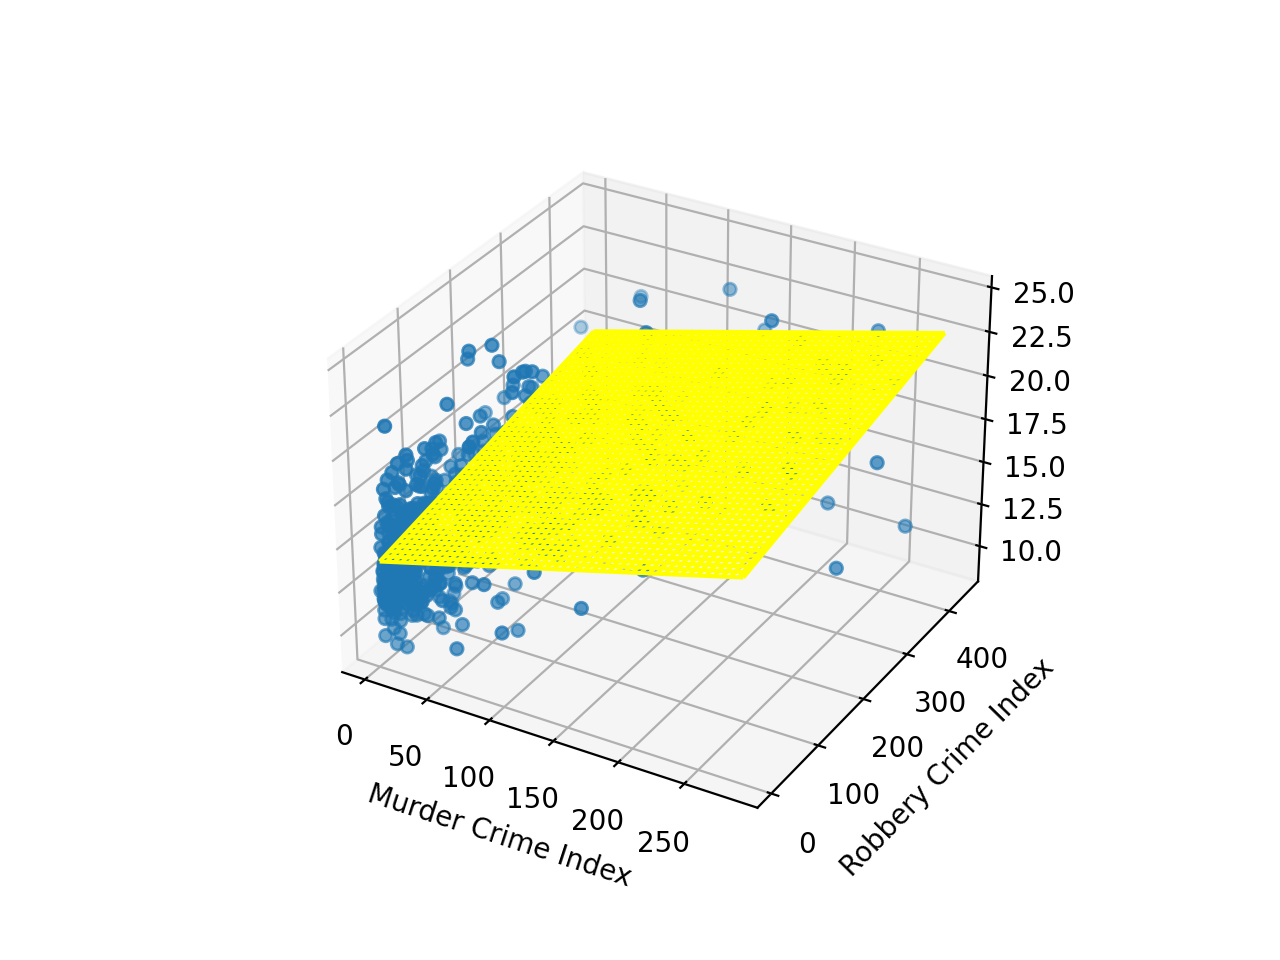

In [48]:
# The same visualization procedure again.
fig_2 = plt.figure()
ax_2 = fig_2.add_subplot(111, projection = '3d')
ax_2.scatter(murder,
           robbery, 
           unemploy
          )
plt.xlabel('Murder Crime Index')
plt.ylabel('Robbery Crime Index')

XX_2, YY_2 = np.mgrid[min(murder):max(murder):3, min(robbery):max(robbery):3]
Z_2 = res_6.params[0] + res_6.params[1] * XX_2 + res_6.params[2] * YY_2
ax_2.plot_wireframe(XX_2, YY_2, Z_2, color = 'yellow')

At this point, it seems that model 4 has provided us the best fit since it has an `Adj. R-square = 0.315`, which is better than model 1, 2, 3, 5, or ,6. We still have one more model yet to be fitted however.

## Finally, we establish a multi-linear regression model using all three of the crime indices.

In [49]:
# All three indices are our predictors.
outcome_7, predictor_7 = patsy.dmatrices('Unemployment ~ Assault_Index + Murder_Index + Robbery_Index', 
                                         outlier_free_data
                                         )  
mod_7 = sm.OLS(outcome_7, predictor_7)
res_7 = mod_7.fit()
res_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     94.29
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           4.19e-50
Time:                        13:53:48   Log-Likelihood:                -1457.7
No. Observations:                 611   AIC:                             2923.
Df Residuals:                     607   BIC:                             2941.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.4696      0.165     81.582      0.000      13.145      13.794
Assault_Index     0.0213      0.003      7.284      0.000       0.016       0.027
Murder_Index      0.0017      0.004      0.449      0.654      -0.006       0.009
Robbery_Index     0.0025      0.002      1.373      0.170      -0.001       0.006
==============================================================================
Omnibus:                       10.052   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.111
Skew:                           0.288   Prob(JB):                      0.00637
Kurtosis:                       3.255   Cond. No.                         276.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpretation of Results
For model No.7, the `Adj. R-squared = 0.315`, which is a tie with model No.4. This means the addition of the third variable `Murder_Index` contributes very little to our determination of prediction of `Unemployment`. The three variables all together can predict only around 31% of the variance in unemployment rate and if we were to consider the three indices as a whole with respect to unemployment rate, we should expect a correlation coefficient (by taking the square root of `Adj. R-squared`) of around only `0.56`, which by most conventions indicates merely medium effect. It is also worth mentioning that the `p-value` for two of our regression coefficients--namely the ones for `Murder_Index` and `Robbery_Index`--have far exceeded the `0.05` critical threshold. Hence, we have uncertainty in our model. This result suggests that a majority of the variance in unemployment rate can be attributed to some other predictor variables other than crime index, which confirms that indeed the relationship and effects of crime index on unemployment rate, as claimed by some of the publishments we researched, are not so tremendously significant. But overall, our hypothesis is validated--there is a positive relationship.

## Exploring Confounds

In [50]:
# We suspect that education may also have effects on unemployment rate in
# addition to crime index, hence we introduce this new set of data containing
# some educational information.
education = pd.read_csv('Data/tfutf.csv')
education_cleaned = education.get(['FIPS', 'UNEMPRT_CY', 'BACHDEG_CY', 'POPULATION']).set_index('FIPS')
education_cleaned.columns = ['Unemployment Rate', 'Bachelor_Degree_Population', 'Population']
education_final = education_cleaned.assign(Education_Percentage = education_cleaned['Bachelor_Degree_Population']/education_cleaned['Population'])
education_final

,Unemployment Rate,Bachelor_Degree_Population,Population,Education_Percentage
FIPS,,,,
6073020109,14.6,442.0,5497,0.080407
6073017010,15.3,991.0,3270,0.303058
6073007702,14.6,1869.0,4157,0.449603
6073020027,12.3,4778.0,17452,0.273780
6073008306,13.9,897.0,3107,0.288703
...,...,...,...,...
6073008339,15.9,401.0,1855,0.216173
6073020107,14.1,453.0,4255,0.106463
6073019701,18.8,801.0,6893,0.116205


In [51]:
# Merge with our 'outlier_free_data'.
new_data = outlier_free_data.merge(education_final, left_index = True, right_index = True)
new_data.drop(columns = ['Unemployment Rate', 'Population', 'Bachelor_Degree_Population'], inplace = True)
new_data

,Assault_Index,Robbery_Index,Unemployment,Murder_Index,Total,Education_Percentage
FIPS,,,,,,
6073020109,69.0,23.0,14.6,43.0,135.0,0.080407
6073007702,14.0,50.0,14.6,19.0,83.0,0.449603
6073017010,20.0,12.0,15.3,13.0,45.0,0.303058
6073008306,28.0,4.0,13.9,5.0,37.0,0.288703
6073020027,65.0,9.0,12.3,6.0,80.0,0.273780
...,...,...,...,...,...,...
6073008339,224.0,331.0,15.9,41.0,596.0,0.216173
6073020107,11.0,8.0,14.1,19.0,38.0,0.106463
6073021500,7.0,26.0,11.3,4.0,37.0,0.233637


In [52]:
# Model No. 8 using all three indices plus education.
outcome_8, predictor_8 = patsy.dmatrices('Unemployment ~ Assault_Index + Murder_Index + Robbery_Index + Education_Percentage', 
                                         new_data
                                         )  
mod_8 = sm.OLS(outcome_8, predictor_8)
res_8 = mod_8.fit()
res_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     39.80
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           1.95e-27
Time:                        13:53:48   Log-Likelihood:                -774.56
No. Observations:                 352   AIC:                             1559.
Df Residuals:                     347   BIC:                             1578.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               16.3371      0.415     39.353      0.000      15.521      17.154
Assault_Index            0.0020      0.004      0.512      0.609      -0.006       0.010
Murder_Index            -0.0082      0.004     -1.897      0.059      -0.017       0.000
Robbery_Index            0.0107      0.002      4.924      0.000       0.006       0.015
Education_Percentage   -13.1856      1.649     -7.996      0.000     -16.429      -9.942
==============================================================================
Omnibus:                       24.569   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.773
Skew:                           0.550   Prob(JB):                     1.26e-07
Kurtosis:                       3.979   Cond. No.                     2.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We see an `Adj. R-squared = 0.307` for model No.8. This is slightly worse than `Adj. R-squared = 0.315` for model No.7, meaning that Bachelor's educational background in reality does not help predict unemployment rate. This result rules out education as a potential confound. We are left with many other potential confounding variables, which can hopefully fill in nearly 0.7 gap in the adjusted r, that can be explored in future analyses.

# Ethics & Privacy

**Ethical consideration in reference to the Deon’s Checklist:**		

#### Question & Privacy

Our question mainly asks about the correlation between block groups’ crime indices and the unemployment rate in that block group in San Diego county in 2020, so we should need to find out the crime indices and the unemployment rate in San Diego county. Here we choose to use the website ArcGis, which has the informative consent from all the people who provide the data, so first, privacy isn’t a big issue because our data is granted by those users.

#### Implication

If the relationship between the unemployment rate and the crime indices have the positive relationship between each other, the government may use this relationship to make some changes to our society. For example, they may issue a new law which provides job opportunities to people in San Diego, and thus the crime indices will be cut off. This is one way to make society become better. Also, if there is a negative relationship between those two variables, we may control it by using opposite methods. If the relationship is weak, which may suggest something new to us. This study seems to produce good results (or at least neural one) to our society.

#### Data Collection (informed consent & collection bias)	

Informed consent: We acquired our raw data from a public website called ArcGis. This website grants full access to their data and maps information, so we will use their data directly and add corresponding references/citations/credits to our project. For this time, we did not use any data that was owned by any private institutions and labs. If we decide to add them in the future, we will follow any rules of regulation and consent. And, we will also show them our research plans and data analysis plan when consent is granted.
Collection bias: When we collect the data, we will abandon any assumptions or prior knowledge about how unemployment rate may increase crime rate in certain areas; Instead, we will select our data randomly and make sure the number of observations is enough to avoid bias. 

Limiting the exposure of personally identifiable information (PII): Our project aims to collect summary data from each specific block group. Therefore, the summary data of unemployment rate and crime indexes will not include any personal information. Also, we acquire these data from the public website ArcGis. We will keep track of the notices from this website; if ArcGis decides to exclude certain parts of their data due to privacy or informed consent issues, we will delete corresponding data in our project as well. In addition, we will also make sure not to include any personal information during our analysis process. 							

#### Data storage

Data security: In order to protect data security, Although we obtain data from some public websites, we should also consider these data as the intellectual property rights of others. we should develop a comprehensive plan to ensure that our original data will not be made public. We store data and analysis on Google Drive and Private Github, and we also make sure that data can only be accessed by our team members. If we are certain that we will not use or interpret our models and analysis in any harmful way, we may disclose the data and analysis in the future.

Data retention: We retain the original version of the data. While modifying and filtering the data, we will also explain how we use the data for analysis in specific documentation.				

#### Analysis & Evaluation

We will further plan the project so that we have a clear document to record every decision we make, and record the problems and changes that each decision brings. First, we will check whether each decision causes summary statistics and reports that are inconsistent with the basic data. At the same time, we ensure to avoid collection bias. We also have a high understanding of the way data is presented to minimize the potential risk of misunderstanding. Every time the data is modified or reorganized, we keep the original document of each step so that we or others can check whether a specific step in the data collation process is reusable.

When we make graphs to visualize our datasets, we will ensure that the graph represents the real data in unbiased ways. And, we will not change the scale of x, y-axis to either enlarge the differences or minimize the differences on purpose; instead, we will look for the scales that best represent our findings. 	 						

#### Modeling		

Proxy discrimination: Before using our data, we did the research about the website ArcGis. Based on what we know so far, ArcGis collected their dataset in a fairly comprehensive and unbiased way. The data of unemployment rate and crime index are available in each block group. Therefore, we believe they do not collect data based on races, sexes, or etc. As we do our analysis, we will also ensure to avoid any kinds of bias or discrimmination information. 

#### Transparency & Appeal (future continuous monitoring) & Communication Bias

It is important for us to make our data transparent to other people, so we share all the processes which we use to process our results here. Because we are now focusing on the data from 2020, it may need continuous effort to this topic (may also do this project in the years later) so that our data can be more appealing to the facts we encountered. There sure are some communication biases, but we are trying to highlight any possible shortcomings which we may see in our data visualization. We are trying to reduce it as much as possible.

#### Deployment				

We will constantly monitor any updates on the website ArcGis, and make sure the datasets we used are the most recent one. After finishing analysis, we will evaluate the results that we made; if our findings resulted in discriminations against any groups or individuals, we will withdraw our research immediately and make corresponding revision to ensure that our study is fair and unbiased. Besides, we have to make sure that our study will not be misused by social media. In order to do that, we will make clear statements about the purpose and the limitations of our studies.	

# Conclusion & Discussion

To sum up, we analyze our data by inspecting the distribution of variables, and we want to see how many unique variables there are here. After that, we use the length of the output array factor into our decision based on how many bins our histogram should take and make suitable images for later inspection. In addition, we decide to look at the extremeness of values between each unemployment rate and three crime indices, and we want to check whether there is an outlier or not. After analyzing our data, we notice that although the total crime index may be the same across different FIPS regions, the unemployment rate actually varies. This is very significant to note since it reveals that our variables are not collinear. Thus, we are not violating some of the ground assumptions of carrying out linear and multilinear regression analyses. This observation also indicates that there is no obvious relationship between unemployment rate and crime indices, which confirms the claim of one of our background-researching papers. However, we begin to consider: is this really the case? We conduct it later in our analyses. 

First of all, In order to exploring the relationship between unemployment rate and any of the three other variables, we create a scatter matrix, and from it, we noticed that it seems that there's an positive relationship between unemployment rate and assault crime index, unemployment rate and robbery crime index, and unemployment rate and murder crime index. Now, we quantify this relationship through linear regression. We then take a look at each pair's Pearson's correlation coefficient to give us an idea of standardized correlation strength, in order for us to potentially draw any comparison. Through our preliminary view on the Pearson's r's, 0.536 > 0.454 and 0.536 > 0.487, it indicates that the assault crime index and the unemployment rate has the strongest positive correlation. Afterward, we establish a multi-linear regression model, which includes murder index, assaulting index, and robbery index. From the summary, we can see that the p-value for correlation between assaulting index and unemployment rate is below 0.001, indicating that there is a correlation between these two variables and this result is not likely due to random chance. However, the p-value is higher than 0.05 for correlations between murder index and unemployment rate & robbery index and unemployment rate. These results can reinforce our conclusion that the assault crime index and the unemployment rate has the strongest positive correlation.

Next step, we discuss the possible outliers we may encounter. Since Pearson's r examinations are preliminary because just like we've mentioned by the end of our last histogram visualizing the distribution of unemployment rates, there seem to be outliers. A few FIPS regions seem to have underwhelmingly low unemployment rates (which are good, just too far from the general cluster) and a few have overwhelmingly high percentages, as we create a boxplot to virtualize it. We hence suspect that these data points are outliers that lie far beyond our inter-quartile range and we decide to have them temporarily removed so that we can see whether they have drastic effects on the strength of our correlation.

We are attempting to validate our hypothesis regarding whether there is a positive relationship between the crime index by FIPS block group and its unemployment rate. Since the crime index is essentially the summation of the three individual indices, we examine how any pair, and finally all three indices as a whole, influence our unemployment rate in order that we can ensure a valid finding that would be in the same domain as our question.Furthermore, a multi-linear regression model can also shed insights on whether there is any confounding variable, and that also affects the unemployment rate here. We then carry on the multilinear analysis by using the dataset outlier_free_data in consistency with our discussion above regarding outliers in our dependent variable, unemployment rate. Our answer now is that, yes, there is a positive relationship between crime index (assault, robbery, and murder index combined) and unemployment rate, although the strength of the positive relationship is limited. The predictors and the outcome follow a medium-strengthed correlation.

Limitation: Although we have enough datasets to test our hypothesis, our data can still contain bias since it was only collected from 2020. As we know, we are having a global pandemic in 2020. Both crime indices and unemployment rate crime indices can be affected by COVID-19. For example, many people may lose their jobs since many companies cannot operate anymore. At the same time, the historic presidential election took place in 2020 as well. As a result, there are many crimes happened based on the result of election, such as "storming of United States Capitol." Therefore, data from 2020 may negatively impact our analysis. Besides, the measure of unemployment rate varies from different websites. Therefore, our data for the unemployment rate might seem higher than it should be. Unfortunately, we are not able to include data from different years nor know how unemployment rate is calculated. These can be our limitations on this project.

Throughout this project, we found that there is a positive correlation between crime index and unemployment rate. A potential extension of this project is that we would like to focus on more details regarding how to reduce the unemployment rate because it might help to reduce crime rates for that area as well. We may also add more variables into account in order to find the factors that cause higher unemployment or higher crime index. Finally, we may construct data information that we can use on solving the problem of higher unemployment rate and higher crime index and contributing to our society in the future


# Team Contributions

Yi Li: 
- Join each group meeting
- Come up with the topic 
- Work on ethics
- Work on justification
- Work on EDA
- Get data and convert to CSV
- Work on conclusion. 

Boning Yang: 
- Join each group’s meeting
- Talk with groupmates about presentation
- Prepare for the slide
- Work on EDA
- Write background literature review, overview, introduction, and conclusion

Guoyi Li:
- Join each group’s meeting
- discuss with groupmates about each step of the project.
- Work on EDA
- Work on figure out coding bug, and solve it with teammates
- Write background literature review, overview, introduction, and conclusion.

Zhibo Peng:
- Join each group’s meeting
- participate in presentation with groupmates
- Check overview
- Do video presentation

Muchan Li: 
- Join each group meeting
- Import data into jupyter notebook
- Cleaning data
- Work on EDA
- Work on data analysis
- Work on data visualization
